In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

The original dataset had over 500+ columns of which most they had calculated themselves. We decided as a group to only use the original data pieces then get other information from them that we may need. This is also because a dataset with 500+ would have not worked on most of our computers and caused more issues with missing values down the line. 

In [67]:
master_dataframe = pd.read_csv('UFCMMABiggestDatasetWithDifferentials/masterdataframe.csv')
master_dataframe_b = master_dataframe[["date","fight_url", "event_url", "result", "fighter", "opponent", "division", "stance", "dob", "method", "total_comp_time", "round", "time",
                                        "fighter_url", "opponent_url", "referee", "time_format", "reach", "height", "age", "knockdowns", "sub_attempts", "reversals", "control", 
                                         "takedowns_landed", "takedowns_attempts", "sig_strikes_landed", "sig_strikes_attempts", "total_strikes_landed", "total_strikes_attempts", 
                                         "head_strikes_landed", "head_strikes_attempts", "body_strikes_landed", "body_strikes_attempts", "leg_strikes_landed", "leg_strikes_attempts",
                                         "distance_strikes_landed", "distance_strikes_attempts", "clinch_strikes_landed", "clinch_strikes_attempts", "ground_strikes_landed", 
                                         "ground_strikes_attempts"]]
display(master_dataframe_b.head())
print("Shape of Master Dataframe:", master_dataframe_b.shape)
master_dataframe_b.info()

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,0,0,1,1,1,1,0,0,0,0
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,1,1,0,0,0,0,1,1,0,0
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,0,0,0,0,1,2,2,2,1,1


Shape of Master Dataframe: (13322, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       13322 non-null  object 
 1   fight_url                  13322 non-null  object 
 2   event_url                  13322 non-null  object 
 3   result                     13322 non-null  int64  
 4   fighter                    13322 non-null  object 
 5   opponent                   13322 non-null  object 
 6   division                   13322 non-null  object 
 7   stance                     13226 non-null  object 
 8   dob                        13087 non-null  object 
 9   method                     13322 non-null  object 
 10  total_comp_time            13322 non-null  int64  
 11  round                      13322 non-null  int64  
 12  time                       13322 non-null  object 
 13  fighter

In [68]:
print("\nMaster Dataframe Summary:")
display(master_dataframe_b.describe())


Master Dataframe Summary:


,result,total_comp_time,round,reach,height,age,knockdowns,sub_attempts,reversals,control,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
count,13322.000000,13322.000000,13322.000000,12039.000000,13308.000000,13087.000000,13322.000000,13322.000000,13322.000000,13322.000000,...,13322.000000,13322.000000,13322.000000,13322.000000,13322.000000,13322.000000,13322.000000,13322.000000,13322.00000,13322.000000
mean,0.491142,628.426813,2.330431,72.136307,70.383228,37.109345,0.215283,0.402792,0.136991,131.914953,...,7.098709,10.299354,5.664390,7.062903,24.714758,64.610344,5.095406,7.397238,5.04714,7.392434
std,0.499940,365.103370,1.013957,4.176705,3.482012,6.217236,0.493830,0.852478,0.423131,174.784787,...,8.225526,11.373791,7.590885,9.369506,27.564745,65.927645,7.381798,10.118685,9.00926,13.067610
min,0.000000,5.000000,1.000000,58.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,272.000000,1.000000,70.000000,68.000000,33.000000,0.000000,0.000000,0.000000,5.000000,...,1.000000,2.000000,1.000000,1.000000,5.000000,14.000000,0.000000,1.000000,0.00000,0.000000
50%,0.000000,794.000000,3.000000,72.000000,71.000000,37.000000,0.000000,0.000000,0.000000,57.000000,...,4.000000,7.000000,3.000000,4.000000,15.000000,43.000000,2.000000,4.000000,1.00000,2.000000
75%,1.000000,900.000000,3.000000,75.000000,73.000000,41.000000,0.000000,1.000000,0.000000,195.000000,...,10.000000,15.000000,8.000000,10.000000,36.000000,96.000000,7.000000,10.000000,6.00000,9.000000
max,1.000000,2160.000000,5.000000,84.000000,83.000000,79.000000,5.000000,10.000000,5.000000,1342.000000,...,117.000000,133.000000,78.000000,101.000000,439.000000,737.000000,95.000000,115.000000,100.00000,141.000000


In [69]:
print("\nMaster Dataframe:")
display(master_dataframe_b.head())


Master Dataframe:


,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,0,0,1,1,1,1,0,0,0,0
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,1,1,0,0,0,0,1,1,0,0
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,0,0,0,0,1,2,2,2,1,1


In [70]:
#MADE EDITS HERE
display(master_dataframe_b.head(20))
display(master_dataframe_b.columns)

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,0,0,1,1,1,1,0,0,0,0
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,1,1,0,0,0,0,1,1,0,0
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,0,0,0,0,1,2,2,2,1,1
5,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Johnny Rhodes,David Levicki,Open Weight,Orthodox,NaN,KO/TKO,...,1,1,1,1,1,1,1,1,9,15
6,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Thaddeus Luster,Frank Hamaker,Open Weight,NaN,NaN,SUB,...,0,0,0,0,0,0,0,0,0,0
7,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Frank Hamaker,Thaddeus Luster,Open Weight,NaN,NaN,SUB,...,0,0,0,0,1,1,0,0,1,2
8,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Robert Lucarelli,Orlando Wiet,Open Weight,NaN,NaN,KO/TKO,...,0,1,1,3,2,6,0,0,0,0
9,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Orlando Wiet,Robert Lucarelli,Open Weight,Southpaw,NaN,KO/TKO,...,1,1,0,0,1,3,0,0,7,9


Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method', 'total_comp_time', 'round',
       'time', 'fighter_url', 'opponent_url', 'referee', 'time_format',
       'reach', 'height', 'age', 'knockdowns', 'sub_attempts', 'reversals',
       'control', 'takedowns_landed', 'takedowns_attempts',
       'sig_strikes_landed', 'sig_strikes_attempts', 'total_strikes_landed',
       'total_strikes_attempts', 'head_strikes_landed',
       'head_strikes_attempts', 'body_strikes_landed', 'body_strikes_attempts',
       'leg_strikes_landed', 'leg_strikes_attempts', 'distance_strikes_landed',
       'distance_strikes_attempts', 'clinch_strikes_landed',
       'clinch_strikes_attempts', 'ground_strikes_landed',
       'ground_strikes_attempts'],
      dtype='object')

### Missing Values

In [71]:
display(master_dataframe_b.isna().sum())
display(master_dataframe_b.count())

date                            0
fight_url                       0
event_url                       0
result                          0
fighter                         0
opponent                        0
division                        0
stance                         96
dob                           235
method                          0
total_comp_time                 0
round                           0
time                            0
fighter_url                     0
opponent_url                    0
referee                        64
time_format                     0
reach                        1283
height                         14
age                           235
knockdowns                      0
sub_attempts                    0
reversals                       0
control                         0
takedowns_landed                0
takedowns_attempts              0
sig_strikes_landed              0
sig_strikes_attempts            0
total_strikes_landed            0
total_strikes_

date                         13322
fight_url                    13322
event_url                    13322
result                       13322
fighter                      13322
opponent                     13322
division                     13322
stance                       13226
dob                          13087
method                       13322
total_comp_time              13322
round                        13322
time                         13322
fighter_url                  13322
opponent_url                 13322
referee                      13258
time_format                  13322
reach                        12039
height                       13308
age                          13087
knockdowns                   13322
sub_attempts                 13322
reversals                    13322
control                      13322
takedowns_landed             13322
takedowns_attempts           13322
sig_strikes_landed           13322
sig_strikes_attempts         13322
total_strikes_landed

## Out of 13322 items: 

# stance: missing 96 
As seen below, since the majority of values are within the Orthodox stance, the 96 missing values were replaced with Orthodox.

In [72]:
print(master_dataframe_b["stance"].value_counts()) #.fillna('1900-01-01', inplace=True)
master_dataframe_b["stance"].fillna('Orthodox', inplace=True)
display(master_dataframe_b.head(10))

stance
Orthodox       10007
Southpaw        2637
Switch           552
Open Stance       24
Sideways           6
Name: count, dtype: int64


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/2020280991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataframe_b["stance"].fillna('Orthodox', inplace=True)
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/2020280991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b["stance"

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,Orthodox,1975-12-04,SUB,...,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,Orthodox,NaN,SUB,...,0,0,1,1,1,1,0,0,0,0
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,1,1,0,0,0,0,1,1,0,0
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,Orthodox,NaN,KO/TKO,...,0,0,0,0,1,2,2,2,1,1
5,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Johnny Rhodes,David Levicki,Open Weight,Orthodox,NaN,KO/TKO,...,1,1,1,1,1,1,1,1,9,15
6,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Thaddeus Luster,Frank Hamaker,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,0,0,0,0,0,0
7,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Frank Hamaker,Thaddeus Luster,Open Weight,Orthodox,NaN,SUB,...,0,0,0,0,1,1,0,0,1,2
8,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Robert Lucarelli,Orlando Wiet,Open Weight,Orthodox,NaN,KO/TKO,...,0,1,1,3,2,6,0,0,0,0
9,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Orlando Wiet,Robert Lucarelli,Open Weight,Southpaw,NaN,KO/TKO,...,1,1,0,0,1,3,0,0,7,9


# dob: missing 235

In [73]:
master_dataframe_b["dob"].fillna('1900-01-01', inplace=True)
display(master_dataframe_b.head(10))

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/2272656395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataframe_b["dob"].fillna('1900-01-01', inplace=True)
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/2272656395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b["dob"].fi

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,Orthodox,1975-12-04,SUB,...,0,0,0,2,0,3,0,1,0,0
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,1900-01-01,SUB,...,0,0,0,0,0,0,1,1,0,0
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,Orthodox,1900-01-01,SUB,...,0,0,1,1,1,1,0,0,0,0
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,1,1,0,0,0,0,1,1,0,0
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,Orthodox,1900-01-01,KO/TKO,...,0,0,0,0,1,2,2,2,1,1
5,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Johnny Rhodes,David Levicki,Open Weight,Orthodox,1900-01-01,KO/TKO,...,1,1,1,1,1,1,1,1,9,15
6,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Thaddeus Luster,Frank Hamaker,Open Weight,Orthodox,1900-01-01,SUB,...,0,0,0,0,0,0,0,0,0,0
7,1994-03-11,http://ufcstats.com/fight-details/d917c8c7461b...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Frank Hamaker,Thaddeus Luster,Open Weight,Orthodox,1900-01-01,SUB,...,0,0,0,0,1,1,0,0,1,2
8,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Robert Lucarelli,Orlando Wiet,Open Weight,Orthodox,1900-01-01,KO/TKO,...,0,1,1,3,2,6,0,0,0,0
9,1994-03-11,http://ufcstats.com/fight-details/3b020d4914b4...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Orlando Wiet,Robert Lucarelli,Open Weight,Southpaw,1900-01-01,KO/TKO,...,1,1,0,0,1,3,0,0,7,9


## referee: missing 64
Since there are only 64 missing referee boxes, they can be filled with "Unknown." 

In [74]:
master_dataframe_b["referee"].fillna('Unknown', inplace=True)
display(master_dataframe_b["referee"].head(10))

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3301198554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataframe_b["referee"].fillna('Unknown', inplace=True)
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3301198554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b["referee

0    John McCarthy
1    John McCarthy
2    John McCarthy
3    John McCarthy
4    John McCarthy
5    John McCarthy
6    John McCarthy
7    John McCarthy
8    John McCarthy
9    John McCarthy
Name: referee, dtype: object

## reach: missing 1283
It seems like most of the reach values are missing from when the data started to first be collected, back in the 1900s. For this value, we will fill it with 0 for now so we can still look through all of the values, but when we are analysing it we will need to separate the older and the newer data from this dataset. 

In [75]:
display(master_dataframe_b["reach"].head(10))
display(master_dataframe_b["reach"].tail(10))
master_dataframe_b["reach"].fillna(0, inplace=True)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: reach, dtype: float64

13312    72.0
13313    69.0
13314    71.0
13315    70.0
13316    79.0
13317    79.0
13318    80.0
13319    77.0
13320    72.0
13321    70.0
Name: reach, dtype: float64

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/574418483.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataframe_b["reach"].fillna(0, inplace=True)
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/574418483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b["reach"].fillna(0, i

# height: missing 14
Since there is only 14 missing pieces from height, and for most of the fighters their dob is missing as well, the 14 rows are dropped. 


In [76]:
print(master_dataframe_b["height"][master_dataframe_b["height"].isna()])
print(master_dataframe_b.iloc[[2,7,38,60,214,215,232,288,304,305,318,3066,3244,3476]])
master_dataframe_b.drop([2,7,38,60,214,215,232,288,304,305,318,3066,3244,3476], axis = 0,inplace = True)

2      NaN
7      NaN
38     NaN
60     NaN
214    NaN
215    NaN
232    NaN
288    NaN
304    NaN
305    NaN
318    NaN
3066   NaN
3244   NaN
3476   NaN
Name: height, dtype: float64
            date                                          fight_url  \
2     1994-03-11  http://ufcstats.com/fight-details/4b9ae533ccb3...   
7     1994-03-11  http://ufcstats.com/fight-details/d917c8c7461b...   
38    1994-09-09  http://ufcstats.com/fight-details/5167a5aec41f...   
60    1995-04-07  http://ufcstats.com/fight-details/fa152ada833d...   
214   1997-05-30  http://ufcstats.com/fight-details/0473ef44197b...   
215   1997-05-30  http://ufcstats.com/fight-details/0473ef44197b...   
232   1997-07-27  http://ufcstats.com/fight-details/f373e50e2fab...   
288   1998-05-15  http://ufcstats.com/fight-details/ea535b46e0f6...   
304   1998-10-16  http://ufcstats.com/fight-details/35b871e0bdc1...   
305   1998-10-16  http://ufcstats.com/fight-details/35b871e0bdc1...   
318   1999-01-08  http://ufcstats.co

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3720853074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b.drop([2,7,38,60,214,215,232,288,304,305,318,3066,3244,3476], axis = 0,inplace = True)


In [77]:
print(master_dataframe_b.head(10))

          date                                          fight_url  \
0   1994-03-11  http://ufcstats.com/fight-details/4acab67848e7...   
1   1994-03-11  http://ufcstats.com/fight-details/4acab67848e7...   
3   1994-03-11  http://ufcstats.com/fight-details/4b9ae533ccb3...   
4   1994-03-11  http://ufcstats.com/fight-details/ccee020be2e8...   
5   1994-03-11  http://ufcstats.com/fight-details/ccee020be2e8...   
6   1994-03-11  http://ufcstats.com/fight-details/d917c8c7461b...   
8   1994-03-11  http://ufcstats.com/fight-details/3b020d4914b4...   
9   1994-03-11  http://ufcstats.com/fight-details/3b020d4914b4...   
10  1994-03-11  http://ufcstats.com/fight-details/17ee4caf0698...   
11  1994-03-11  http://ufcstats.com/fight-details/17ee4caf0698...   

                                            event_url  result  \
0   http://ufcstats.com/event-details/a6a9ab5a824e...       0   
1   http://ufcstats.com/event-details/a6a9ab5a824e...       1   
3   http://ufcstats.com/event-details/a6a9ab5

## age: missing 235
Since age is directly correlated to the dob value, and the dob value was filled in with out of range values, the age of everyone who is NaN will be 0.

In [78]:
master_dataframe_b["age"].fillna(0, inplace=True)
display(master_dataframe_b["age"].head(10))

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3878346580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataframe_b["age"].fillna(0, inplace=True)
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3878346580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b["age"].fillna(0, inp

0     46.0
1      0.0
3     58.0
4      0.0
5      0.0
6      0.0
8      0.0
9      0.0
10     0.0
11     0.0
Name: age, dtype: float64

### Verifying missing values are handled

In [79]:
display(master_dataframe_b.isna().sum())

date                         0
fight_url                    0
event_url                    0
result                       0
fighter                      0
opponent                     0
division                     0
stance                       0
dob                          0
method                       0
total_comp_time              0
round                        0
time                         0
fighter_url                  0
opponent_url                 0
referee                      0
time_format                  0
reach                        0
height                       0
age                          0
knockdowns                   0
sub_attempts                 0
reversals                    0
control                      0
takedowns_landed             0
takedowns_attempts           0
sig_strikes_landed           0
sig_strikes_attempts         0
total_strikes_landed         0
total_strikes_attempts       0
head_strikes_landed          0
head_strikes_attempts        0
body_str

### Standardize Column Names

In [80]:
master_dataframe_b.columns = master_dataframe_b.columns.str.lower().str.replace(' ', '_')

In [81]:
display(master_dataframe_b.columns)

Index(['date', 'fight_url', 'event_url', 'result', 'fighter', 'opponent',
       'division', 'stance', 'dob', 'method', 'total_comp_time', 'round',
       'time', 'fighter_url', 'opponent_url', 'referee', 'time_format',
       'reach', 'height', 'age', 'knockdowns', 'sub_attempts', 'reversals',
       'control', 'takedowns_landed', 'takedowns_attempts',
       'sig_strikes_landed', 'sig_strikes_attempts', 'total_strikes_landed',
       'total_strikes_attempts', 'head_strikes_landed',
       'head_strikes_attempts', 'body_strikes_landed', 'body_strikes_attempts',
       'leg_strikes_landed', 'leg_strikes_attempts', 'distance_strikes_landed',
       'distance_strikes_attempts', 'clinch_strikes_landed',
       'clinch_strikes_attempts', 'ground_strikes_landed',
       'ground_strikes_attempts'],
      dtype='object')

### Converting Data Type
date and dob in Master Dataframe = datetime64[ns]


In [82]:
master_dataframe_b['date'] = pd.to_datetime(master_dataframe_b['date'], errors='coerce')
master_dataframe_b['dob'] = pd.to_datetime(master_dataframe_b['dob'], errors='coerce')

master_dataframe_dtypes = master_dataframe_b.dtypes

master_dataframe_dtypes


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/493859777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b['date'] = pd.to_datetime(master_dataframe_b['date'], errors='coerce')
/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/493859777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b['dob'] = pd.to_datetime(master_dataframe_b['dob'], errors='coerce')


date                         datetime64[ns]
fight_url                            object
event_url                            object
result                                int64
fighter                              object
opponent                             object
division                             object
stance                               object
dob                          datetime64[ns]
method                               object
total_comp_time                       int64
round                                 int64
time                                 object
fighter_url                          object
opponent_url                         object
referee                              object
time_format                          object
reach                               float64
height                              float64
age                                 float64
knockdowns                            int64
sub_attempts                          int64
reversals                       

### Inconsistent Data Entry
"orthadox" to "orthodox"

open stance = open_stance

women's weight class = w- 

In [83]:
master_dataframe_b['stance'] = master_dataframe_b['stance'].str.lower().replace(
    {'orthadox': 'orthodox', 'open stance': 'open_stance', 'sideways': 'sideways'})

master_stance_unique_cleaned = master_dataframe_b['stance'].unique()

master_stance_unique_cleaned


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3070718561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b['stance'] = master_dataframe_b['stance'].str.lower().replace(


array(['orthodox', 'southpaw', 'open_stance', 'sideways', 'switch'],
      dtype=object)

### Removing outliers within the data
### Total_comp_time

<Axes: xlabel='total_comp_time'>

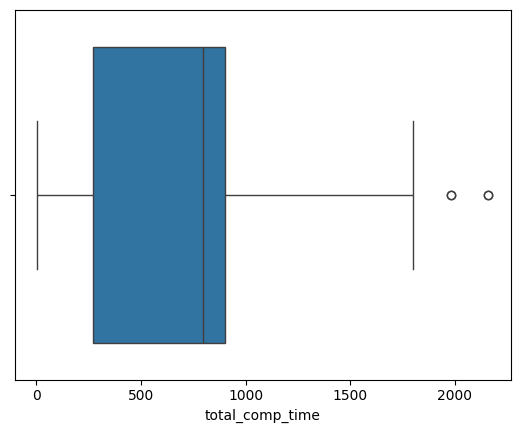

In [84]:
sns.boxplot(x=master_dataframe_b["total_comp_time"])

For most of the data shown above in the box plot, since usual MMA matches are three 5 minute matches with a 1 minute break in between, (60 sec)(3)(5) = 900 so most of the data pieces fall around that area. For championchip rounds they might be five 5 minute matches with a 1 minute break in between, (60 sec)(5)(5) = 1500. For the outliers on the right side seen above, that is when the MMA matches go into overtime. For the lower values for these matches, this most likely means that there was a knockout and therefore the other member fighting won.  

In [85]:
#sorting the values to see the outliers within the data
print(master_dataframe_b["total_comp_time"].sort_values(ascending = False).head(10))
print(master_dataframe_b["date"].iloc[[5, 75, 74, 108, 109, 124, 154, 155, 125, 12069, 5553]])

#we can see that 1500 is not an outlier as it has a count of 424, so we will not remove the rows 12069 and 5553 with the total_comp_time of 1500.
print(master_dataframe_b["total_comp_time"].value_counts())

74      2160
75      2160
109     1980
108     1980
154     1800
155     1800
125     1800
124     1800
7789    1500
688     1500
Name: total_comp_time, dtype: int64
6       1994-03-11
79      1995-07-14
78      1995-07-14
112     1995-12-16
113     1995-12-16
128     1996-02-16
158     1996-07-12
159     1996-07-12
129     1996-02-16
12083   2021-04-17
5567    2014-07-06
Name: date, dtype: datetime64[ns]
total_comp_time
900     5680
1500     424
600       88
299       46
300       46
        ... 
737        2
675        2
1065       2
807        2
1472       2
Name: count, Length: 884, dtype: int64


All of the 8 valid outliers are all from the 1990's so that probably contributed to these being outliers. They might have had different rules for matches back then.

In [86]:
#Removing the outliers within the total_comp_time column
master_dataframe_b.drop([5, 75, 74, 108, 109, 124, 154, 155, 125], axis = 0,inplace = True)

/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3559849367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b.drop([5, 75, 74, 108, 109, 124, 154, 155, 125], axis = 0,inplace = True)


In [87]:
#making sure the rows were dropped
print(master_dataframe_b["total_comp_time"].sort_values(ascending = False).head(10))

13321    1500
2823     1500
2611     1500
2650     1500
2651     1500
2652     1500
2653     1500
11425    1500
11424    1500
11407    1500
Name: total_comp_time, dtype: int64


### round

<Axes: xlabel='round'>

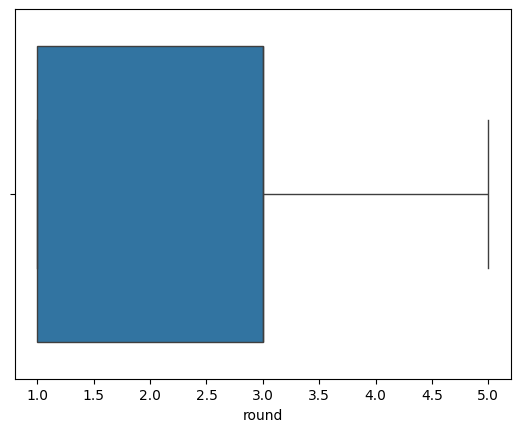

In [88]:
sns.boxplot(x=master_dataframe_b["round"])

In [89]:
print(master_dataframe_b["round"].value_counts())

round
3    6702
1    3859
2    2190
5     476
4      72
Name: count, dtype: int64


Since we take into account the championchip rounds (5 rounds) that are more rare compared to other matches, there are no outliers within the rounds data. For why the rounds may be 1 or 2 this is because some MMA matches get done in that time if there is a knockout or if the other player forfeits. 

### age

44     79.0
73     64.0
51     64.0
55     64.0
115    64.0
462    64.0
69     64.0
210    64.0
56     64.0
90     64.0
Name: age, dtype: float64


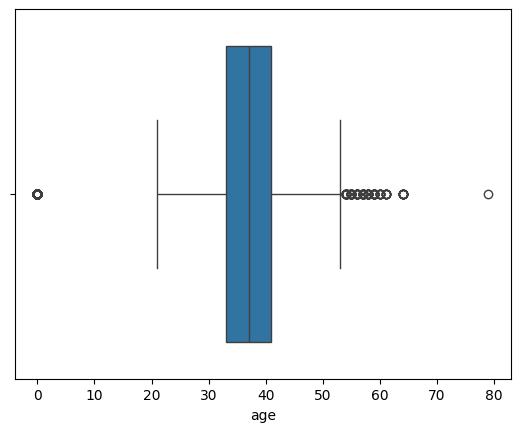

In [90]:
#The data that shows 0 was from the filling in of data values who are N/A so that we can still look through the data without causing any errors in calls
sns.boxplot(x=master_dataframe_b["age"])
#sorting the values to see the outliers within the data
print(master_dataframe_b["age"].sort_values(ascending = False).head(10)) 



In [91]:
print(master_dataframe_b[master_dataframe_b["age"] == 64].count()[0]) 

11


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/3861839864.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(master_dataframe_b[master_dataframe_b["age"] == 64].count()[0])


From a recent value_counts() call, we can see that there are 11 people of age 64 that competed. To be able to analyze that data we can look at the group from 50-64 to be able to see how they did while also grouping in the other outliers within the data.

### sub_attempts

sub_attempts
0     9930
1     2123
2      794
3      283
4       98
5       42
6       13
7       12
8        2
9        1
10       1
Name: count, dtype: int64
1553    10
697      9
2267     8
609      8
4606     7
1889     7
1582     7
2229     7
5721     7
7483     7
Name: sub_attempts, dtype: int64


/var/folders/cx/f_jzjtxj4hb2rmkcqgy_py4w0000gn/T/ipykernel_75901/2267690329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataframe_b.drop([1553, 697, 2267, 609], axis = 0,inplace = True)


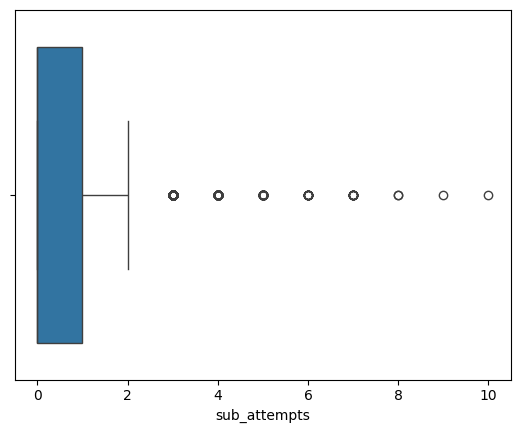

In [92]:
sns.boxplot(x=master_dataframe_b["sub_attempts"])
print(master_dataframe_b["sub_attempts"].value_counts())
print(master_dataframe_b["sub_attempts"].sort_values(ascending = False).head(10))
master_dataframe_b.drop([1553, 697, 2267, 609], axis = 0,inplace = True)

As there are 4 very out of place values for sub_attempts, I chose to remove those rows. 

### Fighting Irrelevant Columns

In [93]:
master_dataframe_cleaned = master_dataframe_b.drop(columns=['event_url', 'fight_url','fighter_url','opponent_url'])
print(master_dataframe_cleaned.columns)

Index(['date', 'result', 'fighter', 'opponent', 'division', 'stance', 'dob',
       'method', 'total_comp_time', 'round', 'time', 'referee', 'time_format',
       'reach', 'height', 'age', 'knockdowns', 'sub_attempts', 'reversals',
       'control', 'takedowns_landed', 'takedowns_attempts',
       'sig_strikes_landed', 'sig_strikes_attempts', 'total_strikes_landed',
       'total_strikes_attempts', 'head_strikes_landed',
       'head_strikes_attempts', 'body_strikes_landed', 'body_strikes_attempts',
       'leg_strikes_landed', 'leg_strikes_attempts', 'distance_strikes_landed',
       'distance_strikes_attempts', 'clinch_strikes_landed',
       'clinch_strikes_attempts', 'ground_strikes_landed',
       'ground_strikes_attempts'],
      dtype='object')


### Saving Cleaned Data

In [94]:
master_dataframe_cleaned.to_csv('cleaned_master_data.csv', index=False)
